In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr,ttest_ind

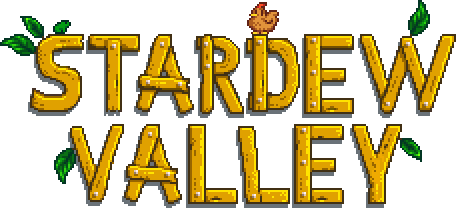


In [2]:
with pd.ExcelFile('Stardew Valley - The Spreadsheet_update4.xlsx') as xls:
    spring = pd.read_excel(xls,'Spring Crops',index_col=None,header = 1)
    summer = pd.read_excel(xls,'Summer Crops',index_col=None,header = 1)
    autumn = pd.read_excel(xls,'Fall Crops',index_col=None,header = 1)
# sell price 1 and 2 refers to price of silver and golden star quality fruit- that's somewhat rng so I won't look at those values
print(spring.head(5))
spring.dtypes

    Cat.           Plant Seed Price  Sell Price  Sell Price.1  Sell Price.2  \
0  Fruit   Cherry (Tree)       3400          80           100           120   
1  Fruit  Apricot (Tree)       2000          50            62            75   
2  Fruit   Ancient Fruit         0G         750           937          1125   
3  Fruit      Strawberry        100         120           150           180   
4    Veg         Rhubarb        100         220           275           330   

  Preserve   Keg  Days Yield Profit  Profit/d Reharvest Profit/Season  \
0      210   240    28     -      -         -         -             -   
1      150   150    28     -      -         -         -             -   
2     1550  2250    28     1    750         -         8             -   
3      290   360     8     1     20       2.5         4           500   
4      490   495    13     1    120  9.230769        13           240   

  Harvests Profit/Season/d                Place Continuous Notes  
0        -         

Cat.               object
Plant              object
Seed Price         object
Sell Price          int64
Sell Price.1        int64
Sell Price.2        int64
Preserve           object
Keg                object
Days                int64
Yield              object
Profit             object
Profit/d           object
Reharvest          object
Profit/Season      object
Harvests           object
Profit/Season/d    object
Place              object
Continuous         object
Notes              object
dtype: object

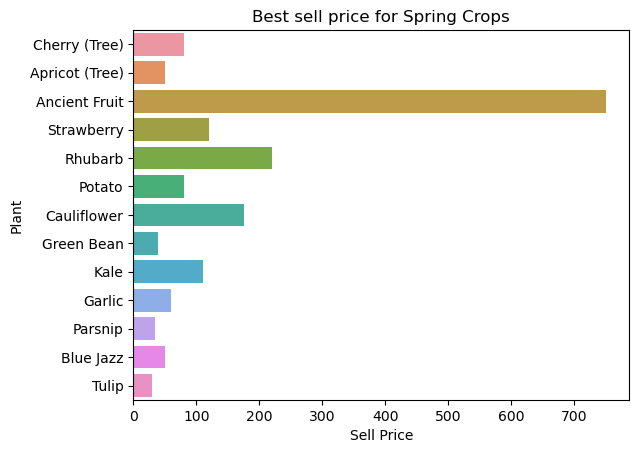

In [3]:
sns.barplot(data=spring, x='Sell Price',y = 'Plant')
plt.title('Best sell price for Spring Crops')
plt.show()

## Best selling crops during Spring!

WINNER!
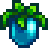



2nd PLACE!
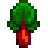

3rd PLACE! 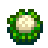

In [4]:
# #Ordered autumn crops price column from highest price to lowest
sorted_autumn = autumn.sort_values(by=['Sell Price'], ascending=False)
print(sorted_autumn['Plant'])

17       Sweet Gem Berry
0          Ancient Fruit
4                Pumpkin
12            Fairy Rose
6              Artichoke
10                   Yam
9               Amaranth
2     Pomegranate (Tree)
3              Cranberry
1           Apple (Tree)
7                   Beet
5                  Grape
11              Bok Choy
13             Sunflower
8               Eggplant
14                  Corn
15                   NaN
16                   NaN
Name: Plant, dtype: object


 # Best selling crops during Autumn

WINNER! 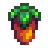

2nd PLACE!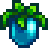

3rd PLACE! 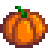

In [5]:
## Is there a correlation between seed price and sale price?
spring['Seed Price'] = spring['Seed Price'].replace('0G', '0')
spring_seed = spring['Seed Price']
spring_sell = spring['Sell Price']
corr, p_value = pearsonr(spring_seed,spring_sell)
print(corr)

## weak negative correlation

-0.16210918091651783


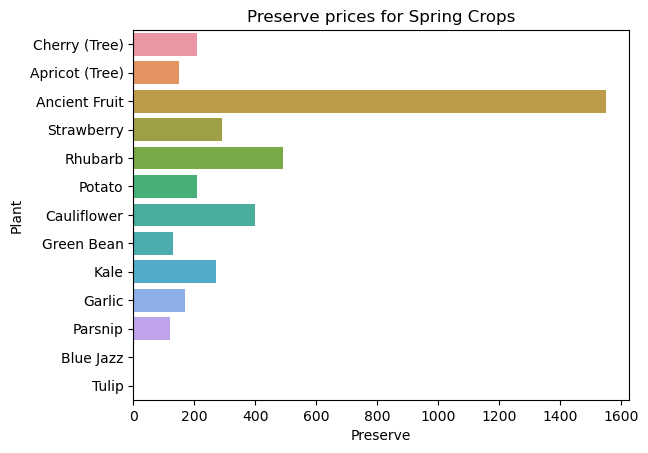

In [13]:
# Removing 'G' from price row and converting to numeric so that 'Preserve' is converted to int64
spring['Preserve'] = spring['Preserve'].replace('-', '0')
spring['Preserve'] = pd.to_numeric((spring['Preserve']))
sns.barplot(data=spring, x='Preserve',y = 'Plant')
plt.title('Preserve prices for Spring Crops')
plt.show()

In [15]:
spring['Keg'] = spring['Keg'].replace('-', 0)
spring['Keg'] = pd.to_numeric(spring['Keg'])
keg_avg = spring['Keg'].mean()
print(keg_avg)
spring['Preserve'] = spring['Preserve'].replace('-', 0)
spring['Preserve'] = pd.to_numeric(spring['Preserve'])
preserve_avg = spring['Preserve'].mean()
print(preserve_avg)

355.38461538461536
306.9230769230769


In [ ]:
spring['Keg'] = spring['Keg'].replace('-', 0)
spring['Keg'] = pd.to_numeric(spring['Keg'])
spring['Preserve'] = spring['Preserve'].replace('-', 0)
spring['Preserve'] = pd.to_numeric(spring['Preserve'])

plant = spring['Plant']
keg = spring['Keg']
preserve = spring['Preserve']
  
x = np.arange(len(plant)) 
  
plt.bar(x - 0.2, keg, 0.4, label = 'Keg') 
plt.bar(x + 0.2, preserve, 0.4, label = 'Preserve') 

plt.xticks(X_axis, plant,rotation = 65) 
plt.xlabel("Crop") 
plt.ylabel("Price") 
plt.title("Difference in price between keg and preserving") 
plt.legend() 
plt.show() 

Making drinks from crops yields more profit! 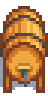